In [125]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import seaborn as sns#; sns.set()
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import datasets, svm, metrics
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Dataframe analysis
## statistical analysis

In [126]:
df = pd.read_csv("winequality-red.csv", sep = ";")
dataFrame = pd.DataFrame(df)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [128]:
# Search for missing, NA and null values)
(df.isnull() | df.empty | df.isna()).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

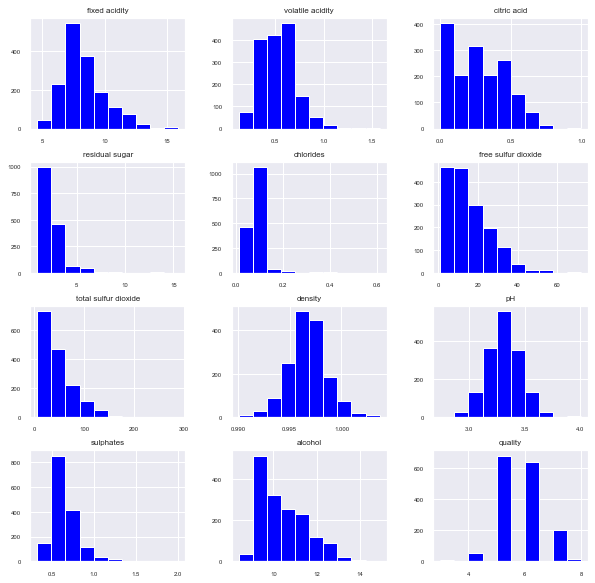

In [129]:
sns.set()
fig = df.hist(figsize=(10,10), color='blue', xlabelsize=6, ylabelsize=6)
[x.title.set_size(8) for x in fig.ravel()]
plt.show()

In [130]:
#Assumption concluded at 3-5 not good wine, 6-8 good wine
df['binaryQuality'] = np.where(df['quality'] >= 6, 1, 0)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binaryQuality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [131]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binaryQuality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [132]:
qualityOne = (df["binaryQuality"] == 0).sum()
qualityTwo= (df["binaryQuality"] == 1).sum()
print(f"Low quality: {qualityOne}, Good quality = {qualityTwo}")

Low quality: 744, Good quality = 855


By analyzing the tables, I declared that the data has 744 rows that were qualified as a low/bad quality wine and 855 as a good quality wine. Likewise, the dataset contains approximately 47% of 0 outcome values and 53% of 1 outcome values.

## split the data into train and test set

In [133]:
x =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']].values
y = df['binaryQuality']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

## Logistsic Regression

In [134]:
logisticRegr = LogisticRegression(multi_class='auto', max_iter=10000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [135]:
predictions = logisticRegr.predict(x_test)

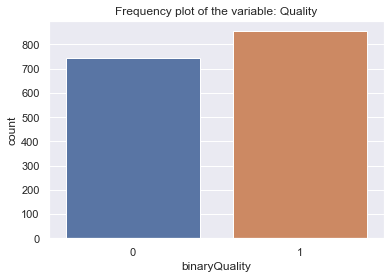

In [136]:
frequency = sns.countplot(x=df["binaryQuality"], data=df).set(title = "Frequency plot of the variable: Quality")

### Model Evaluation
#### Accuracy

In [137]:
scoreTrainingSet = logisticRegr.score(x_train, y_train)
scoreTestset = logisticRegr.score(x_test, y_test)

print(f"Accuracy for test dataset {scoreTestset}\nAccuracy for train dataset:{scoreTrainingSet}")

Accuracy for test dataset 0.7625
Accuracy for train dataset:0.74395329441201


#### Precision

In [138]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       185
           1       0.78      0.78      0.78       215

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



## Decision Tree

In [139]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train, y_train)
predictions = tree.predict(x_test)

### Model Evaluation
#### Accuracy

In [140]:
score = tree_fit.score(x_test, y_test)
print(score)

0.7775


## K-Nearest Neighbors

In [141]:
neighbour = KNeighborsClassifier(n_neighbors=102)
neighbour.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=102)

In [142]:
# Returns a NumPy Array
# Predict for One Observation (image)
neighbour.predict(x_test[0].reshape(1,-1))
neighbour.predict(x_test[0:800])
predictions = neighbour.predict(x_test)

### Model Evaluation
#### Accuracy

In [143]:
# accuracy
# Use score method to get accuracy of model
score = neighbour.score(x_test, y_test)
print(score)

0.635


## Finding the best model

### compare your 3 best models (1 per type) and select and interpret the best one.

After obtaining the results of the different machine learning algorithms, It states that the decision tree model displayed a higher accuracy in predicting the quality of red wine. With an accuracy of 77.25%, this model was able to predict correctly 1,235 values, meaning that the misclassification error of the model was 22.75%.